# Predicting Breast Cancer

In this notebook, I am using the 'Breast Cancer Wisconsin (Diagnostic) Data Set', which was originally published in 1995 by Dr. William H. Wolberg, W. Nick Street and Olvi L. Mangasarian from the University fo Wisconsin, Madison. It contains 569 instances of results of the analysis of cell nuclei from fine needle aspirates (FNA) of breast mass. The question at hand is whether the samples can be robustly classified as malign or benign based on the observed cell nuclei characteristics, such as size and volume. The data set can be found in the UCI Machine Learning repository (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

## Problem Statement

The purpose is to classify cancerous and healthy samples from data describing the properties of the samples' cell nuclei, and thereby predict whether a patient has cancer.



### Exploratory Data Analysis

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches


# import data as pandas dataframe
df = pd.read_csv('data.csv')

Let's have a look at the organization of the data: 

In [220]:
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


We see that our labels column (diagnosis) is categorical either 'M' for malignant (cancer) or 'B' for benign or healthy. 

We need to change the diagnosis column such that is of categorical type ('M' for malign and 'B' for benign is coverted to numercial values: 1: cancer, 0: healthy). This is needed for the future use machine learning algorithms, e.g., logistic regression.  

In [210]:
df['diagnosis'] = df['diagnosis'].astype('category')
df['diagnosis'] = df['diagnosis'].cat.codes

df.head(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


To get a first idea of which features will be most useful in predicting healthy vs. cancer cells, I will explore the data in the form of histograms. This will illustrate the frequencies of cancer diagnoses for different value ranges of each cell nucleus property.

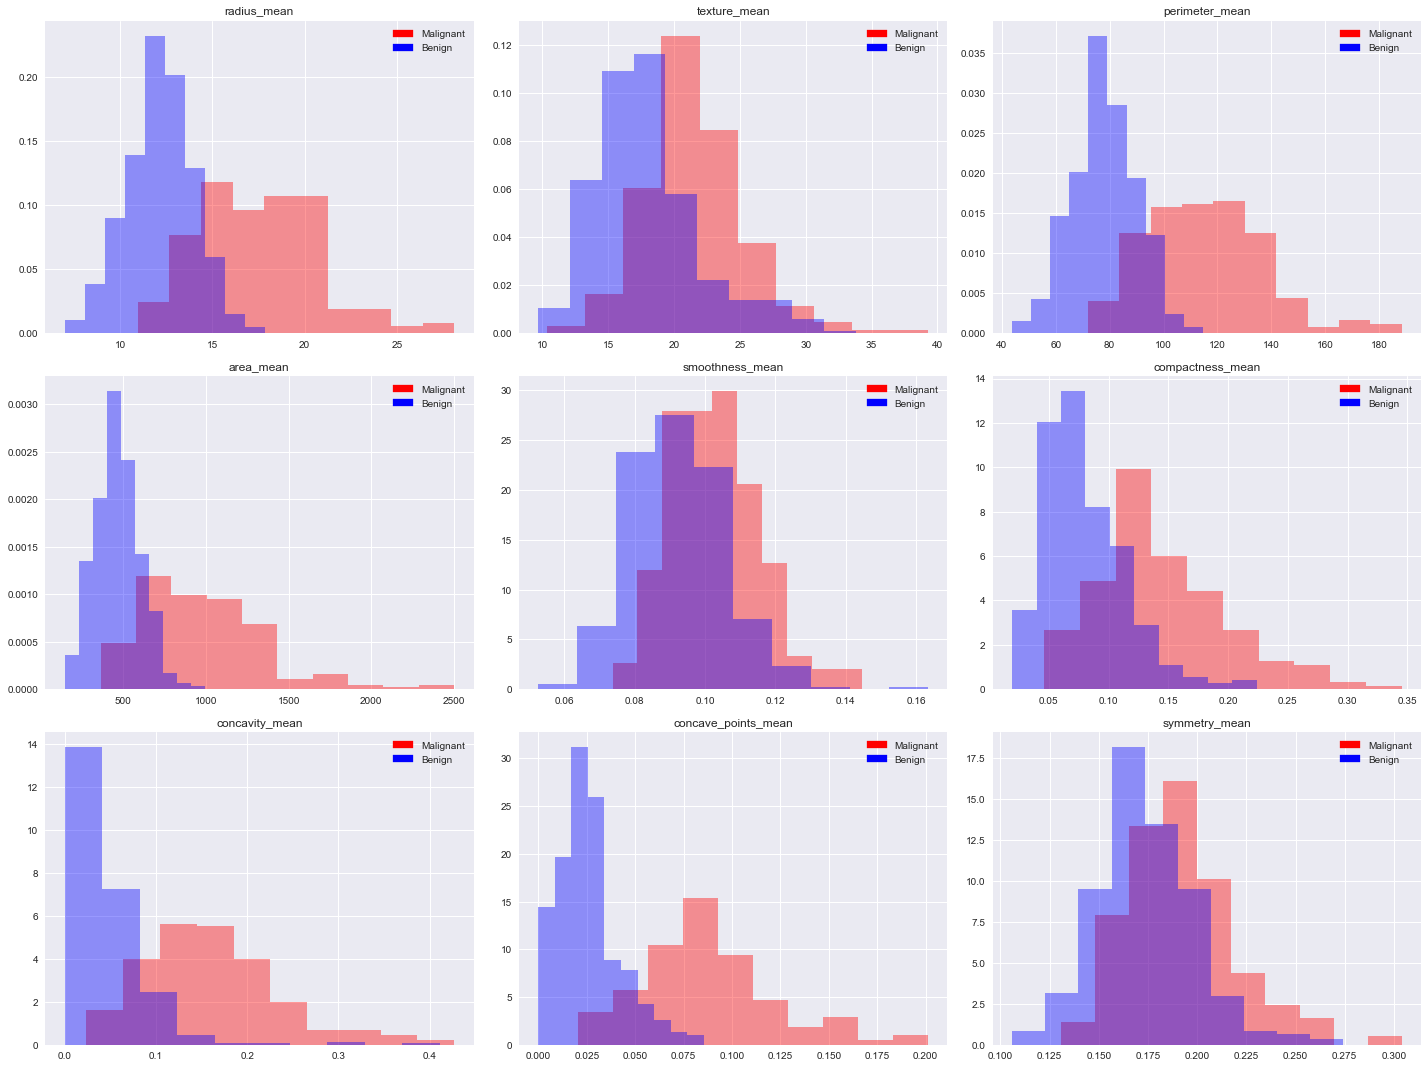

In [132]:
plt.figure(figsize=(20, 15))
for ii, col in enumerate(df.columns[2:11]):
    plt.subplot(3,3,ii+1)
    plt.title(col)
    plt.legend(handles = [patches.Patch(label = 'Malignant', color='red'),
                          patches.Patch(label = 'Benign', color='blue')])
    b = df[df['diagnosis'] == 0][col]
    m = df[df['diagnosis'] == 1][col]
    plt.hist(m, stacked=True, normed = True, color='red', alpha = 0.4)
    plt.hist(b, stacked=True, normed = True, color='blue', alpha = 0.4)
    
plt.tight_layout()
plt.show()

Another way of illustrating differences between two groups of data (benign, malignant) are box plots or violin plots, which are especially well implemented in seaborn. The following is essentially the same representation as above, but making use of violin plots.

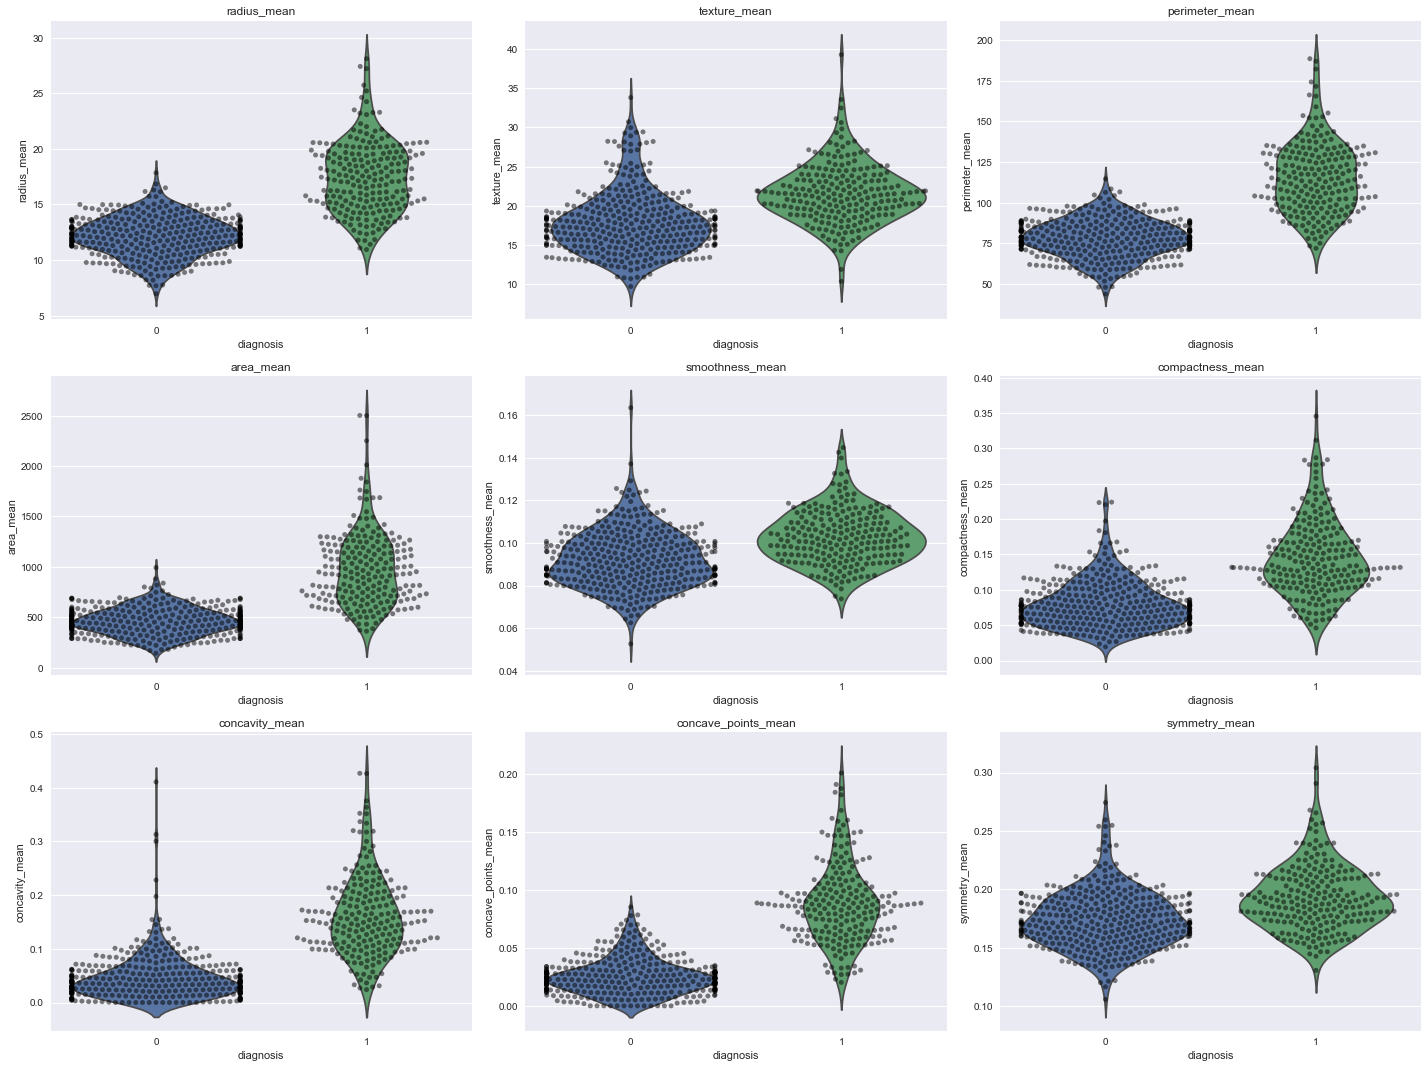

In [133]:
import seaborn as sns



plt.figure(figsize=(20, 15))
for ii, col in enumerate(df.columns[2:11]):
    plt.subplot(3,3,ii+1)
    plt.title(col)
    #plt.legend(handles = [patches.Patch(label = 'Malignant', color='green'), patches.Patch(label = 'Benign', color='blue')])
    
    sns.violinplot(x="diagnosis", y=col, data=df, inner=None)
    sns.swarmplot(x="diagnosis", y=col, data=df, color="black", alpha=.5)
    
    
plt.tight_layout()
plt.show()

###  Predictive Modeling

Given our observations from the figures above, it is quite obvious that the features that distinguish malignant from benign tumors the most are concave points, radius, perimeter, area and concavity.

Before the data can be fed into machine-learning algorithms, we need a preprocessing step, since the data is not on the same scale, and varies over several orders of magnitude. scikit-learn has a preprocessing package that can be used to transform the data onto the same scale.

Next, we are splitting our data set into a train and test fraction of 80% and 20%, respectively. 

Lastly, we extract the above mentioned features into a feature vector, in addition to the correspnding labels.

In [233]:
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
train, test = train_test_split(df, test_size = 0.3)

X_test = test[['radius_mean', 'area_mean', 'perimeter_mean', 'compactness_mean', 'symmetry_mean', 'concave_points_mean', 'texture_mean', 'concavity_mean']]
X_train = train[['radius_mean', 'area_mean', 'perimeter_mean', 'compactness_mean', 'symmetry_mean', 'concave_points_mean', 'texture_mean', 'concavity_mean']]

# scaling the data
#X_test = preprocessing.scale(X_test)
#X_train = preprocessing.scale(X_train)

# normalizing the data
X_test_norm = preprocessing.normalize(X_test)
X_train_norm = preprocessing.normalize(X_train)

y_test = test[['diagnosis']]
y_train = train[['diagnosis']]

Now we can use the exracted features and labels and feed them into machine learning algorithms. Since we have a **classification** problem at hand, a few algorithms come to mind: Logistic regression, k-Nearest Neighbors (kNN), Decision Tree/Random Forest, or Support Vector Machines (SVMs).

### Decision Tree

The most intuitive one is a Decision Tree, which we can run in the following way:

1) Imorting the necessary packages:

In [143]:
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz

Create a classifier, train the model with the training data set, and print the details of our model:

In [243]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


Use the test data set, to check how well the model perfoms outside the training data.

In [244]:
# make predictions
expected = y_test
predicted = model.predict(X_test)

# summarize the fit of the model
predicted_train = model.predict(X_train)

print('---------------------------------')
print('Training Score')
print(metrics.accuracy_score(y_train, predicted_train))
print(metrics.classification_report(y_train, predicted_train))
print(metrics.confusion_matrix(y_train, predicted_train))
print('---------------------------------')
print('Test Score')
print(metrics.accuracy_score(expected, predicted))
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print('---------------------------------')
print('Feature Importance: ')
print(model.feature_importances_)

---------------------------------
Training Score
1.0
             precision    recall  f1-score   support

          B       1.00      1.00      1.00       249
          M       1.00      1.00      1.00       149

avg / total       1.00      1.00      1.00       398

[[249   0]
 [  0 149]]
---------------------------------
Test Score
0.941520467836
             precision    recall  f1-score   support

          B       0.97      0.94      0.95       108
          M       0.90      0.95      0.92        63

avg / total       0.94      0.94      0.94       171

[[101   7]
 [  3  60]]
---------------------------------
Feature Importance: 
[ 0.00361613  0.05026065  0.05201381  0.03451646  0.0117027   0.72850897
  0.07331149  0.04606979]


# COMPUTE TRAINING ERROR, COMPARE VS TEST ERROR TO SEE IF OVERFITTING...
We observe that the model predicts quite a few false positives (FPs) and false negatives (FNs). The Precision (how many true positives (TPs) and truly identified as such) and f1-score/accuracy (rate of true identifications by the model) are relatively low at 89%. Moreover, looking at the feature importance, apparently one single feature (concave points) was given a much higher importance than all other ones combined (70%). Likely there is overfitting: The model does not generaize well to the test data set. Random Forests is a machine-learning algorithm that constructs multiple decision trees. This compensates for the habit of single decision trees to overfit. 

### Random Forest

In [246]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)
print(model)
expected = y_test
predicted = model.predict(X_test)

predicted_train = model.predict(X_train)

print('---------------------------------')
print('Training Score')
print(metrics.accuracy_score(y_train, predicted_train))
print(metrics.classification_report(y_train, predicted_train))
print(metrics.confusion_matrix(y_train, predicted_train))
print('---------------------------------')
print('Test Score')
print(metrics.accuracy_score(expected, predicted))
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print('---------------------------------')
print('Feature Importance: ')
print(model.feature_importances_)

/Users/stefan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
---------------------------------
Training Score
1.0
             precision    recall  f1-score   support

          B       1.00      1.00      1.00       249
          M       1.00      1.00      1.00       149

avg / total       1.00      1.00      1.00       398

[[249   0]
 [  0 149]]
---------------------------------
Test Score
0.953216374269
             precision    recall  f1-score   support

          B       0.96      0.96      0.96       108
          M       0.94      0.94      0.94        63

avg / total       0.95      0.95      0.95       171

[[104   4]
 [  4  59]]
----------------------------

We can see a significant increase in both precision (93%) and accuracy (92%). Also, the feature importance is more equally distributed among the individual features. Importantly, only one healthy sample was incorrectly identified. 

Another typical model that can be used for classifying categorical values is logistic regression, which we will try next.

### Logistic Regression

In [247]:
# Import necessary packages for Logistic Regression

from sklearn import linear_model, datasets
from sklearn.model_selection import cross_val_score

logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)
print(logistic)

# make predictions
expected = y_test
predicted = logistic.predict(X_test)
predicted_train = logistic.predict(X_train)

# summarize the fit of the model
print(logistic.score(X_test, y_test))
print(logistic.score(X_train, y_train))
print(metrics.accuracy_score(expected, predicted))
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.888888888889
0.912060301508
0.888888888889
             precision    recall  f1-score   support

          B       0.89      0.94      0.91       108
          M       0.89      0.79      0.84        63

avg / total       0.89      0.89      0.89       171

[[102   6]
 [ 13  50]]


# Conclusions
Using logistic regression to classify this data set yields a further improvement compared to random forests, with a precision and accuracy of both 95%.

In summary logistic regression performs best in this case of classifying breast cancer samples based on the qualities of cell nuclei from fine needle aspirates of breast mass.